In [3]:
import numpy as np
import pandas as pd
import yahoofinancials as yf
from tqdm import tqdm
import pickle

In [4]:
med_holdings = pd.read_csv('data/SWMCX_FundHoldings_2021-02-28.CSV')

In [5]:
sm_holdings = pd.read_csv('data/SWSSX_FundHoldings_2021-02-28.CSV')

In [6]:
med_holdings.dropna(inplace=True)
sm_holdings.dropna(inplace=True)

In [7]:
med_holdings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 821
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   As-Of-Date    820 non-null    object 
 1   Symbol        820 non-null    object 
 2   Name          820 non-null    object 
 3   % of Assets   820 non-null    float64
 4   Market Value  820 non-null    float64
dtypes: float64(2), object(3)
memory usage: 38.4+ KB


In [8]:
sm_holdings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2034
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   As-Of-Date    2029 non-null   object 
 1   Symbol        2029 non-null   object 
 2   Name          2029 non-null   object 
 3   % of Assets   2029 non-null   float64
 4   Market Value  2029 non-null   float64
dtypes: float64(2), object(3)
memory usage: 95.1+ KB


In [9]:
med_high_assets = med_holdings[med_holdings["% of Assets"] > 0.1]
len(med_high_assets)

366

In [10]:
sm_high_assets = sm_holdings[sm_holdings["% of Assets"] > 0.1]
len(sm_high_assets)

308

In [42]:
tickers = list(med_high_assets.Symbol.append(
    sm_high_assets.Symbol, ignore_index=True))

In [43]:
def pickle_single_stock_data(stock_data):
    with open(f'data/stock_data/{list(stock_data.keys())[0]}', 'wb') as handle:
        pickle.dump(stock_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:
# get summary data for every stock in our list of tickers
for ticker in tqdm(tickers):
    stock_data = yf.YahooFinancials(ticker).get_summary_data()
    pickle_single_stock_data(stock_data)

100%|██████████████████████████████████████████████████████████████████████████████| 674/674 [1:30:06<00:00,  8.02s/it]


In [11]:
import os
import glob
path = 'data/stock_data/'
all_files = glob.glob(os.path.join(path, "*"))

In [12]:
# read in the stock data and concatenate into a dataframe
stocks = []
for filename in all_files:
    df = pd.DataFrame.from_dict(pd.read_pickle(filename), orient='index')
    stocks.append(df)
stock_df = pd.concat(stocks)

In [13]:
# drop any columns with >=50% NA values in the column
stock_df = stock_df.loc[:, stock_df.isnull().mean() < 0.1]
# drop any rows without a beta value
stock_df = stock_df[~stock_df.beta.isna()]

In [14]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, A to ZS
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   previousClose                 648 non-null    float64
 1   regularMarketOpen             648 non-null    float64
 2   twoHundredDayAverage          648 non-null    float64
 3   payoutRatio                   587 non-null    object 
 4   regularMarketDayHigh          648 non-null    float64
 5   averageDailyVolume10Day       648 non-null    int64  
 6   regularMarketPreviousClose    648 non-null    float64
 7   fiftyDayAverage               648 non-null    float64
 8   open                          648 non-null    float64
 9   averageVolume10days           648 non-null    int64  
 10  expireDate                    648 non-null    object 
 11  exDividendDate                648 non-null    object 
 12  beta                          648 non-null    object 
 13  startDate  

In [15]:
stock_df.describe()

,previousClose,regularMarketOpen,twoHundredDayAverage,regularMarketDayHigh,averageDailyVolume10Day,regularMarketPreviousClose,fiftyDayAverage,open,averageVolume10days,regularMarketDayLow,...,dayLow,ask,askSize,volume,fiftyTwoWeekHigh,maxAge,fiftyTwoWeekLow,bid,bidSize,dayHigh
count,648.000000,648.000000,648.000000,648.000000,6.480000e+02,648.000000,648.000000,648.000000,6.480000e+02,648.000000,...,648.000000,648.000000,648.000000,6.480000e+02,648.000000,648.0,648.000000,648.000000,648.000000,648.000000
mean,132.325914,133.024679,122.620710,136.022240,2.516656e+06,132.325914,135.676070,133.024679,2.516656e+06,130.861014,...,130.861014,136.536080,1242.746914,2.339327e+06,156.492939,1.0,65.234229,131.591296,1260.339506,136.022240
std,231.513463,231.852495,220.935798,239.155629,5.772540e+06,231.513463,235.839677,231.852495,5.772540e+06,230.228583,...,230.228583,241.006002,2434.300839,9.529880e+06,259.769637,0.0,127.588157,234.856113,2571.953931,239.155629
min,5.850000,5.880000,4.492230,5.970000,0.000000e+00,5.850000,6.058571,5.880000,0.000000e+00,5.780000,...,5.780000,0.000000,800.000000,2.291300e+04,7.003000,1.0,1.260000,0.000000,0.000000,5.970000
25%,49.907500,50.347500,42.992968,51.320000,5.311932e+05,49.907500,49.707143,50.347500,5.311932e+05,48.725000,...,48.725000,50.185000,800.000000,3.782605e+05,58.100000,1.0,19.162500,48.237500,800.000000,51.320000
50%,84.105000,85.260000,77.201690,86.345000,1.018481e+06,84.105000,86.124143,85.260000,1.018481e+06,83.245000,...,83.245000,86.380000,900.000000,7.429655e+05,99.825000,1.0,41.570000,84.400000,900.000000,86.345000
75%,146.495000,146.680000,135.673365,151.105000,2.175928e+06,146.495000,151.414385,146.680000,2.175928e+06,145.385000,...,145.385000,152.535000,1100.000000,1.830852e+06,175.005000,1.0,73.362500,142.525000,1100.000000,151.105000
max,4567.860000,4569.040000,4273.718800,4749.990000,7.342709e+07,4567.860000,4620.883000,4569.040000,7.342709e+07,4561.520000,...,4561.520000,4755.220000,40000.000000,2.166310e+08,4832.800000,1.0,2294.720000,4710.020000,38500.000000,4749.990000


In [16]:
# convert any columns that can reliably be represented numerically as numeric columns
stock_df = stock_df.apply(pd.to_numeric, errors='ignore')

In [17]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, A to ZS
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   previousClose                 648 non-null    float64
 1   regularMarketOpen             648 non-null    float64
 2   twoHundredDayAverage          648 non-null    float64
 3   payoutRatio                   587 non-null    float64
 4   regularMarketDayHigh          648 non-null    float64
 5   averageDailyVolume10Day       648 non-null    int64  
 6   regularMarketPreviousClose    648 non-null    float64
 7   fiftyDayAverage               648 non-null    float64
 8   open                          648 non-null    float64
 9   averageVolume10days           648 non-null    int64  
 10  expireDate                    648 non-null    object 
 11  exDividendDate                648 non-null    object 
 12  beta                          648 non-null    float64
 13  startDate  

In [18]:
from pandas.plotting import scatter_matrix
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 10)

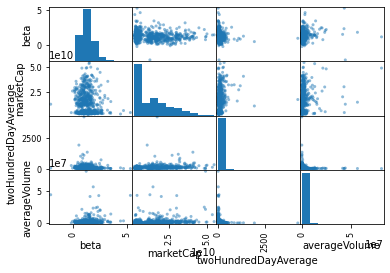

In [19]:
scatter_matrix(
    stock_df[['beta', 'marketCap', 'twoHundredDayAverage', 'averageVolume']])
pass

In [20]:
# these columns are pretty redundant
stock_df = stock_df.drop(['tradeable', 'currency'], axis=1)

In [21]:
# drop date-related columns, as we don't really care about them
stock_df = stock_df.drop(['expireDate', 'exDividendDate', 'startDate'], axis=1)

In [22]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, A to ZS
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   previousClose                 648 non-null    float64
 1   regularMarketOpen             648 non-null    float64
 2   twoHundredDayAverage          648 non-null    float64
 3   payoutRatio                   587 non-null    float64
 4   regularMarketDayHigh          648 non-null    float64
 5   averageDailyVolume10Day       648 non-null    int64  
 6   regularMarketPreviousClose    648 non-null    float64
 7   fiftyDayAverage               648 non-null    float64
 8   open                          648 non-null    float64
 9   averageVolume10days           648 non-null    int64  
 10  beta                          648 non-null    float64
 11  regularMarketDayLow           648 non-null    float64
 12  priceHint                     648 non-null    int64  
 13  regularMark

In [23]:
columns_to_drop = ['previousClose', 'regularMarketOpen', 'regularMarketDayHigh', 'regularMarketPreviousClose',
                   'open', 'regularMarketDayLow', 'regularMarketVolume', 'priceHint', 'averageVolume', 'dayLow',
                   'ask', 'askSize', 'bid', 'bidSize', 'volume', 'dayHigh', 'maxAge', 'payoutRatio']
stock_df.drop(columns_to_drop, axis=1, inplace=True)
stock_df.drop(['OKTA', 'UPWK'], inplace=True)

In [24]:
stock_df

,twoHundredDayAverage,averageDailyVolume10Day,fiftyDayAverage,averageVolume10days,beta,marketCap,priceToSalesTrailing12Months,fiftyTwoWeekHigh,forwardPE,fiftyTwoWeekLow
A,114.528275,1629150,122.974850,1629150,1.010834,38282256384,6.922650,136.980,28.882760,68.14
AA,19.994532,7195425,26.984285,7195425,2.654205,6107601920,0.657721,33.450,13.217741,5.71
AAL,15.898058,46267525,21.025429,46267525,1.858071,14667771904,0.846039,26.090,88.192314,8.25
AAON,66.960500,180100,75.037140,180100,0.639219,3781918720,7.349939,81.250,47.900665,43.84
AAP,159.274750,964112,170.189710,964112,1.330985,12274030592,1.214490,188.170,16.845325,81.94
...,...,...,...,...,...,...,...,...,...,...
ZBH,150.406400,887425,159.974000,887425,1.358613,33531330560,4.773483,170.050,18.714619,88.00
ZBRA,371.423520,468150,472.759160,468150,1.654387,25501810688,5.733321,516.790,27.843550,170.63
ZEN,129.127270,1227575,142.372000,1227575,1.275731,15384035328,14.942282,166.600,124.419050,56.60
ZG,128.302950,766387,161.094860,766387,1.418743,30947401728,9.266197,212.400,95.710144,28.26


In [25]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, A to ZS
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   twoHundredDayAverage          646 non-null    float64
 1   averageDailyVolume10Day       646 non-null    int64  
 2   fiftyDayAverage               646 non-null    float64
 3   averageVolume10days           646 non-null    int64  
 4   beta                          646 non-null    float64
 5   marketCap                     646 non-null    int64  
 6   priceToSalesTrailing12Months  644 non-null    float64
 7   fiftyTwoWeekHigh              646 non-null    float64
 8   forwardPE                     631 non-null    float64
 9   fiftyTwoWeekLow               646 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 55.5+ KB


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [27]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [28]:
prepared_stock_data = pipeline.fit_transform(stock_df)
stock_data_only_beta_marketcap = pipeline.fit_transform(
    stock_df[['beta', 'marketCap']])

In [29]:
from sklearn.cluster import KMeans

In [30]:
km = KMeans(n_clusters=5, copy_x=False).fit(stock_data_only_beta_marketcap)

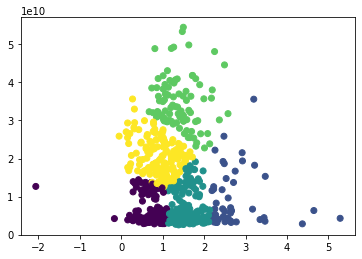

In [31]:
mpl.pyplot.scatter(stock_df['beta'], stock_df['marketCap'], c=km.labels_)

In [32]:
stock_df['cluster'] = km.labels_

In [33]:
stock_df

,twoHundredDayAverage,averageDailyVolume10Day,fiftyDayAverage,averageVolume10days,beta,marketCap,priceToSalesTrailing12Months,fiftyTwoWeekHigh,forwardPE,fiftyTwoWeekLow,cluster
A,114.528275,1629150,122.974850,1629150,1.010834,38282256384,6.922650,136.980,28.882760,68.14,3
AA,19.994532,7195425,26.984285,7195425,2.654205,6107601920,0.657721,33.450,13.217741,5.71,1
AAL,15.898058,46267525,21.025429,46267525,1.858071,14667771904,0.846039,26.090,88.192314,8.25,2
AAON,66.960500,180100,75.037140,180100,0.639219,3781918720,7.349939,81.250,47.900665,43.84,0
AAP,159.274750,964112,170.189710,964112,1.330985,12274030592,1.214490,188.170,16.845325,81.94,2
...,...,...,...,...,...,...,...,...,...,...,...
ZBH,150.406400,887425,159.974000,887425,1.358613,33531330560,4.773483,170.050,18.714619,88.00,3
ZBRA,371.423520,468150,472.759160,468150,1.654387,25501810688,5.733321,516.790,27.843550,170.63,3
ZEN,129.127270,1227575,142.372000,1227575,1.275731,15384035328,14.942282,166.600,124.419050,56.60,4
ZG,128.302950,766387,161.094860,766387,1.418743,30947401728,9.266197,212.400,95.710144,28.26,3


In [38]:
stock_df.to_csv('data/processed_data/processed_data.csv')

In [40]:
np.save('data/processed_data/transformed_data.npy', prepared_stock_data)